# Deep Learning for Image Classification Assessment


Welcome to your assessment! Follow the instructions in bold below to complete the assessment.

If you get stuck, check out the solutions video and notebook. (Make sure to run the solutions notebook before posting a question to the QA forum please, thanks!)

------------

## The Challenge

**Your task is to build an image classifier with Keras and Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

## The Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [1]:
from tensorflow import keras
import tensorflow as tf
fashion_mnist = keras.datasets.fashion_mnist
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

## Visualizing the Data

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

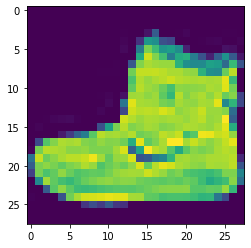

In [3]:
plt.imshow(x_train[0])

## Preprocessing the Data

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [4]:
maxValue = x_train.max()
print(maxValue)

255


In [5]:
x_train = x_train/maxValue
x_test = x_test/maxValue

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [6]:
NoElementsTrain, widthTrain, heightTrain = x_train.shape
print(NoElementsTrain, widthTrain, heightTrain)
NoElementsTest, widthTest, heightTest = x_test.shape
print(NoElementsTest, widthTest, heightTest)

60000 28 28
10000 28 28


In [7]:
x_train = x_train.reshape(NoElementsTrain, widthTrain, heightTrain,1)

In [8]:
x_test = x_test.reshape(NoElementsTest, widthTest, heightTest,1)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [9]:
from keras.utils import to_categorical


Using TensorFlow backend.


In [10]:
print(y_test)

[9 2 1 ... 8 1 5]


In [11]:
y_train_enco = to_categorical(y_train)

In [12]:
y_test_enco = to_categorical(y_test)

## Building the Model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=32 and kernel_size=(4,4)
* Pooling Layer where pool_size = (2,2)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [13]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten

In [14]:
model = Sequential()

W0904 21:25:00.673595 15612 deprecation_wrapper.py:119] From C:\Users\Vernon\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [15]:
# Convolutional layer
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation = 'relu'))
# Polling Layer
model.add(MaxPool2D(pool_size=(2,2)))
# Flatten Layer
model.add(Flatten())
# Dense layer
model.add(Dense(128,activation='relu'))
# Final Layer
model.add(Dense(10,activation = 'softmax'))

W0904 21:25:00.806858 15612 deprecation_wrapper.py:119] From C:\Users\Vernon\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0904 21:25:00.813839 15612 deprecation_wrapper.py:119] From C:\Users\Vernon\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0904 21:25:00.867255 15612 deprecation_wrapper.py:119] From C:\Users\Vernon\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4267: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [16]:
# Compilation
model.compile(loss= 'categorical_crossentropy', optimizer = 'rmsprop',metrics = ['accuracy'])


W0904 21:25:00.974309 15612 deprecation_wrapper.py:119] From C:\Users\Vernon\Anaconda3\lib\site-packages\keras\optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0904 21:25:01.032156 15612 deprecation_wrapper.py:119] From C:\Users\Vernon\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3576: The name tf.log is deprecated. Please use tf.math.log instead.



In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


### Training the Model
**TASK 6: Train/Fit the model to the x_train set. Amount of epochs is up to you.**

In [18]:
model.fit(x_train,y_train_enco,epochs = 4)

W0904 21:25:01.329363 15612 deprecation.py:323] From C:\Users\Vernon\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0904 21:25:01.503407 15612 deprecation_wrapper.py:119] From C:\Users\Vernon\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/4
34304/60000 [================>.............] - ETA: 29s - loss: 0.4548 - acc: 0.8384

KeyboardInterrupt: 

### Evaluating the Model

**TASK 7: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [ ]:
model.metrics_names

In [ ]:
model.evaluate(x_test,y_test_enco)

In [ ]:
predictions = model.predict_classes(x_test)
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,predictions))

# Great Job!